In [1]:
from sklearn import tree
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('play_tennis.csv')
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


#Preprocessing

In [3]:
#Changing caterogical features into float
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['outlook'] = encoder.fit_transform(df['outlook'])
df['temp'] = encoder.fit_transform(df['temp'])
df['humidity'] = encoder.fit_transform(df['humidity'])
df['wind'] = encoder.fit_transform(df['wind'])

In [4]:
df = df.drop(['day'], axis=1)

In [5]:
df

,outlook,temp,humidity,wind,play
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes
5,1,0,1,0,No
6,0,0,1,0,Yes
7,2,2,0,1,No
8,2,0,1,1,Yes
9,1,2,1,1,Yes


In [6]:
X = df.iloc[:, :-1]    #Features
y = df.iloc[:, -1]     #Label

#Making the model

In [7]:
ID3DTclf = tree.DecisionTreeClassifier(criterion = 'entropy')
ID3DTclf = ID3DTclf.fit(X,y)

GCclf = tree.DecisionTreeClassifier(criterion = "gini")
GCclf = GCclf.fit(X, y)

In [9]:
prediction = ID3DTclf.predict([[0,1,0,1]])
print(prediction)

['Yes']


#Plot Tree

[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232,

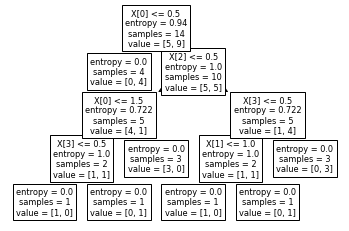

In [10]:
#ID3 Tree
tree.plot_tree(ID3DTclf)

[Text(148.8, 195.696, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0

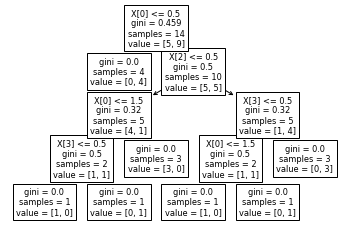

In [11]:
#Gini Cart Tree
tree.plot_tree(GCclf)